# Elements of Data Science: A First Course 

# COMS W4995 008 2017 3


## Week 9: Dimensionality Reduction and Application: Image Recognition

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Reading: 


## Today

- Dimensionality Reduction

- Image Recognition

- Dynamic Visualization

## Dimensionality Reduction

#### Why do dimensionality reduction?

- visualization

 - compression (reduce storage space)

- analysis (feature selection/engineering)

### Principle Component Analysis (PCA)

 - unsupervised

- center and rotate

- components are orthogonal vectors explaining variance

In [2]:
# stock price returns for Chevron (CVX) and Exxon-Mobil (XOM)
df = pd.read_csv('../data/sp500_px.csv', index_col=0)
df = df[['CVX','XOM']]

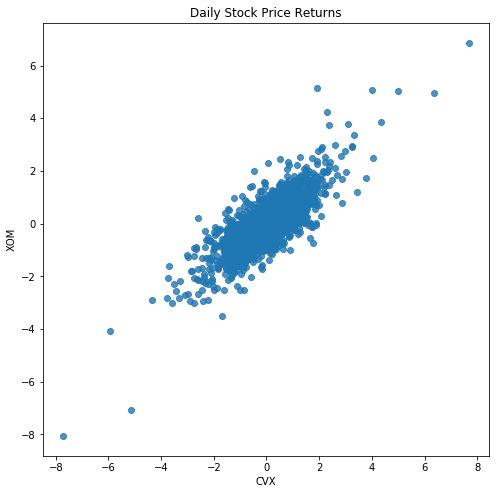

In [3]:
# plot XOM against CVS
# can we choose either dimension over the other based on variance?
fig = plt.figure(figsize=(8,8))
_ = sns.regplot(x='CVX',y='XOM',data=df,fit_reg=False)
_ = plt.title('Daily Stock Price Returns')
_ = plt.gca().set_aspect('equal')

In [4]:
# function to plot a vector
def draw_vector(v0,v1,ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(width=3,
                    headwidth=12,
                    shrink=0,
                    color='k'
                    #arrowstyle='->',
                    #linewidth=6,
                    #shrinkA=0,shrinkB=0
                   )
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data, pca vectors and pca planes
def plot_pca(df,pca,num_components=1,colors=['r','g'],fig=None):
    fig = fig or plt.figure(figsize=(14,6))
    plt.subplot2grid((2,2), (0, 0), rowspan=2)
    sns.regplot(x=df.columns[0],y=df.columns[1],data=df,fit_reg=False);
    plt.scatter(2,4,c='k',linewidths=5)

    for i in range(num_components):
        length = pca.explained_variance_[i]
        vector = pca.components_[i]
        slope0 = vector[1] / vector[0]
        _= plt.plot([-7,7],[slope0*-7,slope0*7],color=colors[i])
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_,pca.mean_ + v)
    plt.gca().set_aspect('equal')
    #plt.axis([-8.5, 8.5, -8.5, 8.5])
    X = pca.transform(df)
    for i in range(num_components):
        plt.subplot2grid((2,2), (i, 1))
        plt.plot([-8,8],[0,0],colors[i])
        plt.scatter(X[:,i],[0]*len(X));
        plt.scatter(pca.transform([[2,4]])[0][i],0,color='k',linewidths=5)
        plt.axis([-8.5, 8.5, -1, 1]);
        plt.xlabel('component '+str(i))

In [5]:
from sklearn.decomposition import PCA

# extract the first 2 principle compenents
pca = PCA(n_components=2).fit(df)

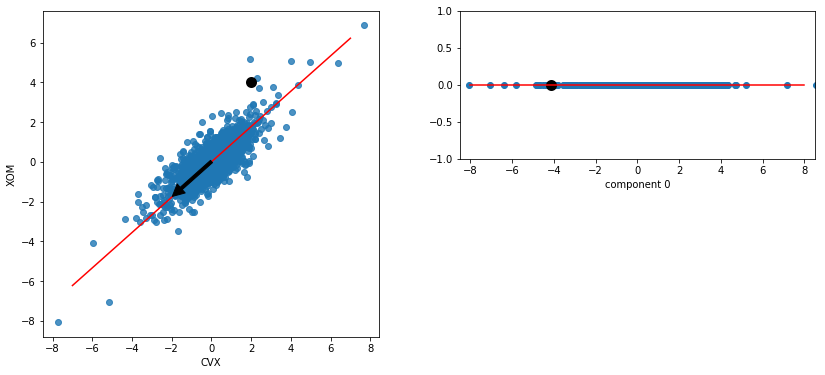

In [6]:
# plot dataset, and first principle component
plot_pca(df,pca,num_components=1)

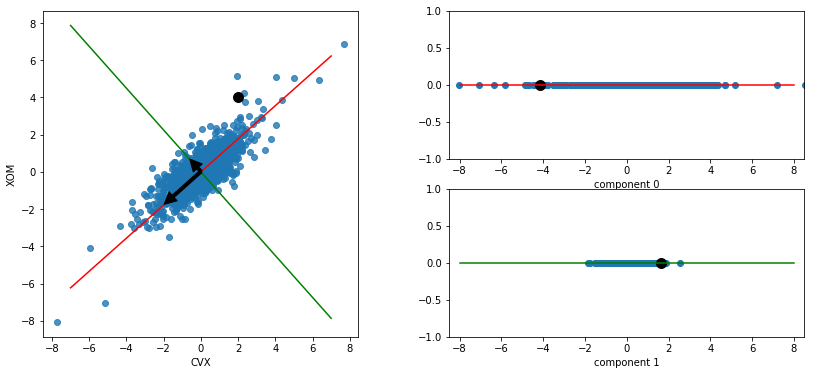

In [7]:
# plot dataset, and both components
plot_pca(df,pca,num_components=2)

In [8]:
# what does the data look like in the transformed space?
X = pca.transform(df)

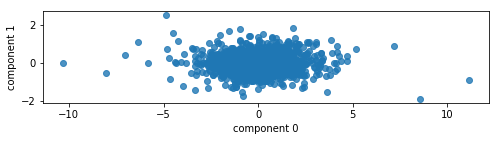

In [9]:
fig = plt.figure(figsize=(8,8))
_= sns.regplot(X[:,0],X[:,1],fit_reg=False)
_ = plt.xlabel('component 0')
_ = plt.ylabel('component 1')
_ = plt.gca().set_aspect('equal')

In [10]:
# how much of the variance is explained by each component
pca.explained_variance_ratio_

array([0.89585804, 0.10414196])

In [11]:
# what does the first component (vector) look like?
pca.components_[0]

array([-0.74710069, -0.66471089])

In [12]:
# and the second
pca.components_[1]

array([-0.66471089,  0.74710069])

In [13]:
# what if we add a third dimension
# stock price returns for Chevron (CVX), Exxon-Mobil (XOM) and Apple (AAPL)
df = pd.read_csv('../data/sp500_px.csv')
df = df[['CVX','XOM','AAPL']]

#### 3d Scatter Plot

<IPython.core.display.Javascript object>


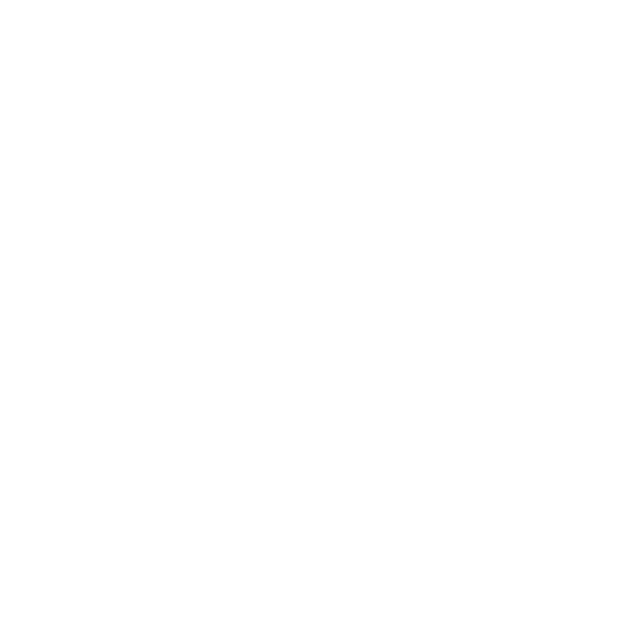

In [14]:
#from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib notebook
%matplotlib notebook

fig = plt.figure(figsize=(8,8));
ax = fig.add_subplot(1,1,1, projection='3d');
ax.scatter3D(df['CVX'],df['XOM'],df['AAPL'], alpha=.2);
ax.set(xlabel='CVX',ylabel='XOM',zlabel='AAPL');

In [15]:
## see notebook for plotly

In [16]:
import plotly as py
import  plotly.graph_objs as go

#%matplotlib inline
py.offline.init_notebook_mode(connected=False)

trace1 = go.Scatter3d(x=df['CVX'],y=df['XOM'],z=df['AAPL'],
                      mode='markers',
                      marker=dict(size=5,opacity=0.2))
layout = go.Layout(scene = dict(xaxis=dict(title='CVX'),yaxis=dict(title='XOM'),zaxis=dict(title='AAPL')))
fig = go.Figure(data=[trace1],layout=layout)
py.offline.iplot(fig)
#_ = ax.set(xlabel='CVX',ylabel='XOM',zlabel='AAPL')

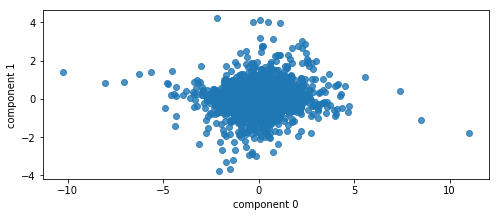

In [17]:
# reset to inline plotting
%matplotlib inline
%matplotlib inline

X = pca.fit_transform(df)

fig = plt.figure(figsize=(8,8))
_= sns.regplot(X[:,0],X[:,1],fit_reg=False)
_ = plt.xlabel('component 0')
_ = plt.ylabel('component 1')
_ = plt.gca().set_aspect('equal')

In [18]:
pca.components_

array([[-0.7311725 , -0.64883418, -0.21071541],
       [ 0.13576895,  0.16429949, -0.97702225]])

### Review

- Uses of dimensionality reduction
- Feature selection vs Feature engineering

## Image Recognition

In [19]:
from skimage import data, color, feature
import skimage.data

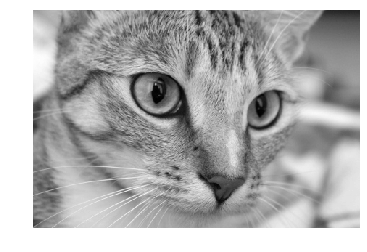

In [20]:
image = color.rgb2gray(data.chelsea())
_ = plt.imshow(image, cmap='gray')
_ = plt.gca().axis('off')

#### What are the features?

- pixel values

In [21]:
image[0][:5]

array([0.48523098, 0.48523098, 0.47738784, 0.47738784, 0.47738784])

- color histograms

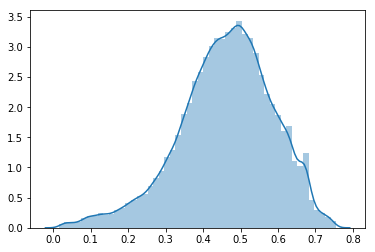

In [22]:
_ = sns.distplot(image.flatten())

- texture features

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c5/NaturalTexture.png?1510266837010", style="width: 30%">

 - decompositions

In [23]:
pca = PCA(n_components=5).fit(image.flatten().reshape(1,-1))

In [24]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

In [25]:
X = digits['data']
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

# n rows by m columns
print(X_train.shape)

# reshaping to 8x8 pixels
X[0].reshape(8,-1)

(1347, 64)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

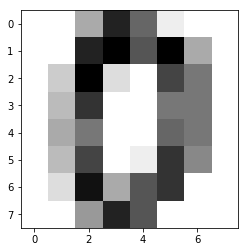

In [26]:
plt.imshow(255 - X[0].reshape(8,-1), cmap='gray');

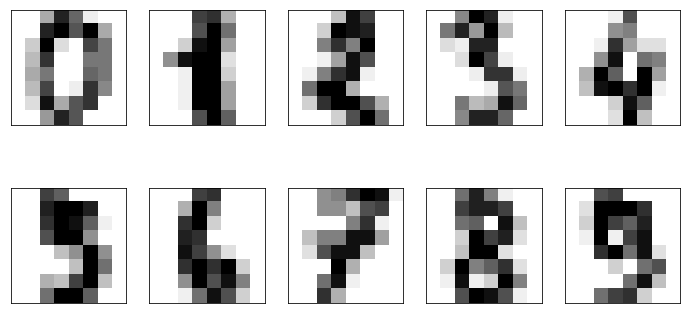

In [27]:
fig,ax = plt.subplots(2,5,figsize=(12,6),subplot_kw=dict(xticks=[],yticks=[]))

for i,axi in enumerate(ax.flatten()):
    _ = axi.imshow(255-digits['images'][i], cmap='gray')

In [28]:
# extract principle components
pca = PCA(n_components=64).fit(X_train)

In [29]:
pca.components_[0]

array([ 3.87278619e-18, -1.74929171e-02, -2.23300461e-01, -1.40114792e-01,
       -2.90052168e-02, -9.15230260e-02, -7.62081763e-03,  3.27439342e-03,
       -3.04869216e-04, -1.20292447e-01, -2.46697982e-01,  1.42871928e-01,
       -4.73002045e-02, -2.13130153e-01, -1.37634848e-02,  4.89380976e-03,
        5.89163754e-05, -8.12074369e-02,  8.90941848e-02,  2.12608912e-01,
       -1.76359705e-01, -1.54547054e-01,  3.34769091e-02,  4.51100701e-03,
        1.25085000e-04,  6.87792156e-02,  2.67499218e-01, -3.19266673e-02,
       -2.12648855e-01, -2.48149868e-02,  6.49906144e-02,  2.93116337e-04,
       -0.00000000e+00,  1.69406101e-01,  3.76819562e-01,  1.52231318e-01,
        6.59735187e-02,  5.73991209e-02,  3.61513452e-02, -0.00000000e+00,
        1.09976357e-03,  1.14159057e-01,  3.08654918e-01,  2.31793340e-01,
        1.94243266e-01,  3.04046663e-02, -2.91917729e-02,  1.47516338e-03,
        8.35513212e-04, -7.04835563e-03, -5.54772554e-02,  8.19058139e-02,
        1.02704738e-01, -

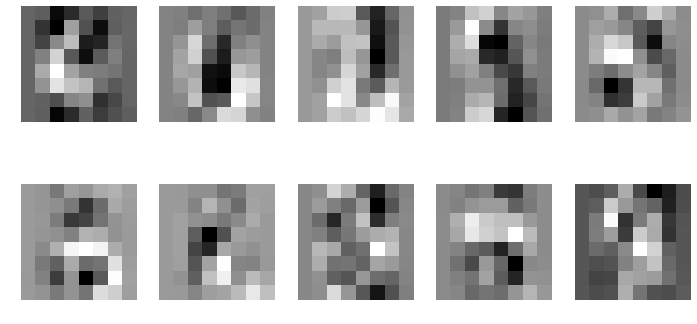

In [30]:
# plotting the first 10 components (eigenfaces)
fig,ax = plt.subplots(2,5,figsize=(12,6))
for i,axi in enumerate(ax.flatten()):
    _ = axi.imshow(pca.components_[i].reshape(8,8),cmap='gray')
    _ =  axi.axis('off')

### Example: Face Detection

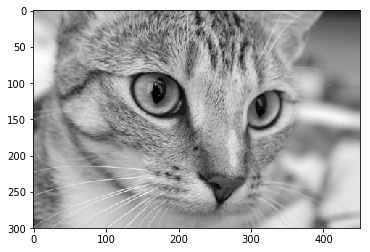

In [31]:
# plotting an image
image = color.rgb2gray(data.chelsea())
_ = plt.imshow(image, cmap='gray')

In [32]:
# extracting HOG features
hog_vec, hog_vis = feature.hog(image, visualise=True)

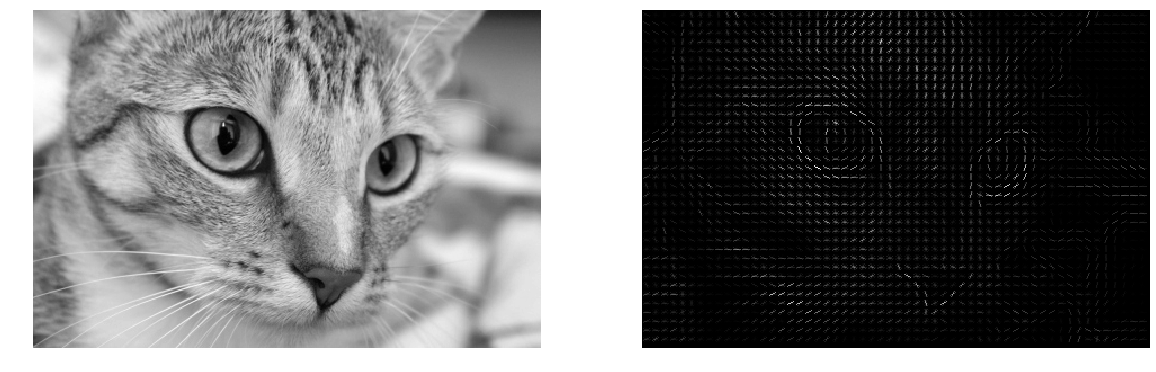

In [33]:
# plotting HOG features
fig, ax = plt.subplots(1,2,figsize=(20,8))
_ = ax[0].imshow(image,cmap='gray')
_ = ax[1].imshow(hog_vis, cmap='gray')
_ = ax[0].axis('off'); _ = ax[1].axis('off')

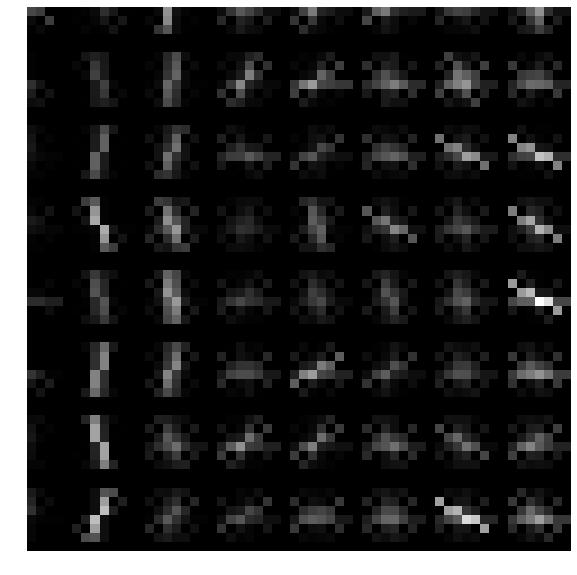

In [34]:
# plotting HOG features zoomed in
fig = plt.figure(figsize=(10,10))
_ = plt.imshow(hog_vis[20:80,20:80], cmap='gray')
_ = plt.gca().axis('off')

In [35]:
# getting the set of faces
# this step may take a while
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images[:1000]
positive_patches.shape

(1000, 62, 47)

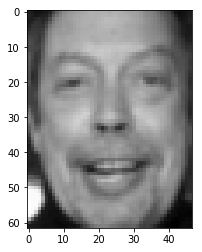

In [36]:
_ = plt.imshow(positive_patches[0],cmap='gray')

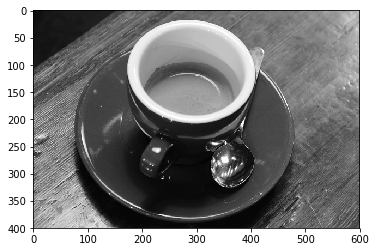

In [37]:
# getting a set of non-faces
from skimage import data, transform
imgs_to_use = ['camera','text','coins','moon',
               'page','clock','immunohistochemistry',
               'chelsea','coffee','hubble_deep_field']
images = [color.rgb2gray(getattr(data,name)()) for name in imgs_to_use]

_ = plt.imshow(images[8], cmap='gray')

In [38]:
# code to extract patches from images
from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale*np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches

In [39]:
# extract negative patches from images
# this step takes a while
negative_patches = np.vstack([extract_patches(im, 100, scale)
                              for im in images for scale in [0.5,1.0,2.0]])
negative_patches.shape

(3000, 62, 47)

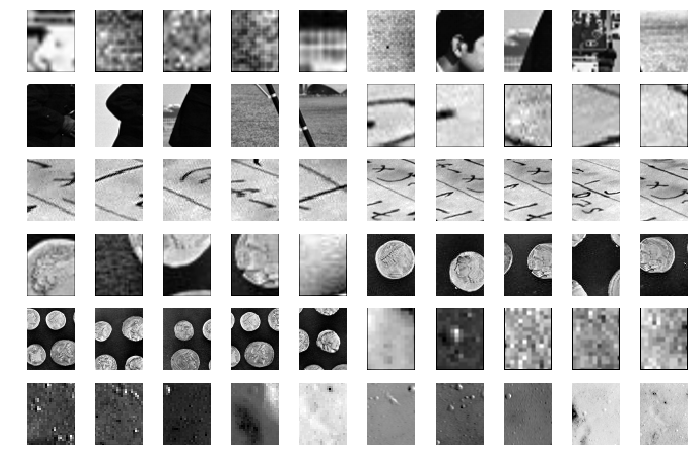

In [40]:
# plot a few of the negative patches
fig,ax = plt.subplots(6,10,figsize=(12,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[20*i], cmap='gray')
    axi.axis('off')

In [41]:
# create a training set from face and non-face images
from itertools import chain
X_train = np.array([feature.hog(im)
                    for im in chain(positive_patches,negative_patches)])

y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0] ]= 1

X_train.shape,y_train.shape

((4000, 1215), (4000,))

In [42]:
# get CV accuracy for a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

np.mean(cross_val_score(LogisticRegression(), X_train, y_train))

/home/bgibson/anaconda3/envs/coms007ext/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



0.9722513087042376

In [43]:
# grid search and cv accuracy for a Support Vector classifier
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
gs = GridSearchCV(LinearSVC(),{'C':[1.0,2.0,4.0]})
gs.fit(X_train,y_train)
gs.best_score_, gs.best_params_

/home/bgibson/anaconda3/envs/coms007ext/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



(0.98225, {'C': 2.0})

In [44]:
# collecting the best fit model
model = gs.best_estimator_
model.fit(X_train,y_train)

LinearSVC(C=2.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

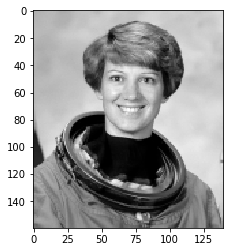

In [45]:
# plot a test image with a face
test_image = transform.rescale(color.rgb2gray(skimage.data.astronaut()),0.5)[:160,40:180]
_ = plt.imshow(test_image, cmap='gray')

In [46]:
# generate sliding windows across an image
def sliding_window(img, patch_size=positive_patches[0].shape,
                   istep=2, jstep=2, scale=1.0):
    Ni, Nj = (int(scale*s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i+Ni, j:j+Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i,j),patch

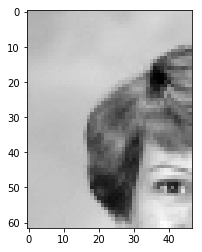

In [47]:
# the first sliding window
indices, patches = zip(*sliding_window(test_image))
_ = plt.imshow(patches[10], cmap='gray')

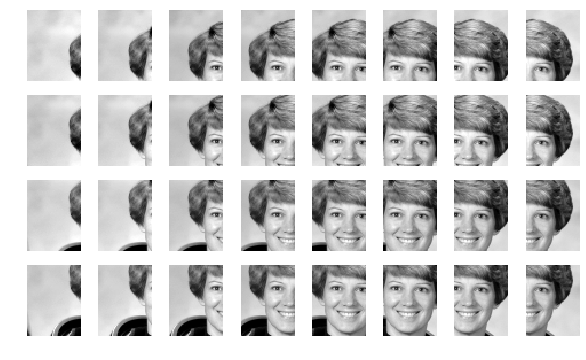

In [48]:
# plot sliding windows across the positive image
indices, patches = zip(*sliding_window(test_image,istep=10,jstep=10))
fig,ax = plt.subplots(4,8,figsize=(10,6))
for i, axi in enumerate(ax.flat):
    _ = axi.imshow(patches[i], cmap='gray')
    _ = axi.axis('off')

In [49]:
# generate the set of test images
patches_hog = np.array([feature.hog(patch) for patch in patches])
patches_hog.shape

(80, 1215)

In [50]:
# generate the set of predictions
labels = model.predict(patches_hog)
labels.sum()

2.0

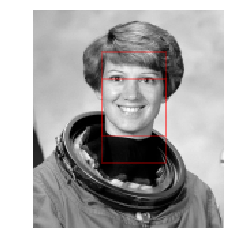

In [51]:
# plot the set of predicted faces
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

Ni,Nj = positive_patches[0].shape
indices = np.array(indices)

for i,j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j,i), Nj, Ni, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))

#### Going further:
    
Convolutional Neural Networks

https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721